## Observable Trends

* Capomulin, (out of the four options ploted), is the drug you want to take if you have a cancerous tumor. 
* Would be interesting to dive deeper and take a look at Ramicane as a similar performing option to Capmulin. 
* Even though Capomulin treatment presented initial positive results, none of the treatments were able to stop the cancer spread. The metastatic spread increased at a constant rate over the 45 days of treatment.
* The Capomulin treatment presented a superiour survival rate when compared to the other three requested, roughly 80%. The treatment using the drug Infubinol presented a survival rate below 50% after 45 days.
* Would be interested in seeking blind data that supports a human response to placebo versus a mouse, especially since placebo's are typically more effective than shown.

In [16]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
clinical_data_complete = pd.merge(clinical_data, mouse_drug_data, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
clinical_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [17]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
tumor_vols_mean = clinical_data_complete.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumor_vols_mean = pd.DataFrame(tumor_vols_mean)

# Flatten the column headings
tumor_vols_mean = tumor_vols_mean.reset_index()

# Preview DataFrame
tumor_vols_mean

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [18]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_vols_sem = clinical_data_complete.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumor_vols_sem = pd.DataFrame(tumor_vols_sem)

# Preview DataFrame
tumor_vols_sem.head().reset_index()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


## Metastatic Response to Treatment

In [19]:
# Minor Data Munging to Re-Format the Data Frames
tumor_vols_mean = tumor_vols_mean.reset_index()
tumor_vols_pivot_mean = tumor_vols_mean.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

tumor_vols_sem = tumor_vols_sem.reset_index()
tumor_vols_pivot_sem = tumor_vols_sem.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
tumor_vols_pivot_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


## Survival Rates

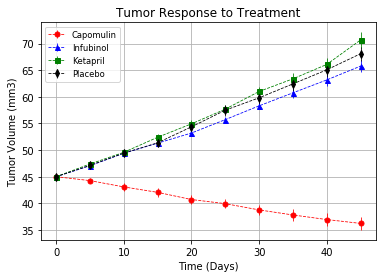

In [35]:
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Capomulin"], yerr=tumor_vols_pivot_sem["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.80)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Infubinol"], yerr=tumor_vols_pivot_sem["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.80)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Ketapril"], yerr=tumor_vols_pivot_sem["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.80)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Placebo"], yerr=tumor_vols_pivot_sem["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.80)

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("OUTPUT/Fig1.png")

# Show the Figure
plt.show()

## Metastic Response to Treatment

In [21]:
columns = ['Drug', 'Timepoint', 'Metastatic Sites']

metastatic_response = clinical_data_complete[columns].groupby(by=['Drug', 'Timepoint'], as_index=True).mean()
metastatic_response.head(5)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

## Store the Standard Error

In [22]:
columns = ['Drug', 'Timepoint', 'Metastatic Sites']

metastatic_response_error = clinical_data_complete[columns].groupby(by=['Drug', 'Timepoint'], as_index=True).sem()
metastatic_response_error.head(5)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

## Data Munging

In [23]:
metastatic_response = metastatic_response.unstack(level = 0)
metastatic_response.columns = metastatic_response.columns.get_level_values(1)

metastatic_response.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [24]:
metastatic_response_error = metastatic_response_error.unstack(level = 0)
metastatic_response_error.columns = metastatic_response_error.columns.get_level_values(1)

metastatic_response_error.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


## Generate Plot with Error Bars

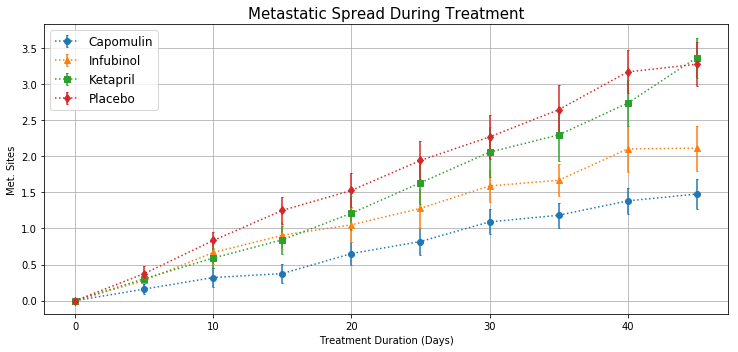

In [36]:
columns = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1, 2, 1)

ax.set_title('Metastatic Spread During Treatment', fontsize=15)
ax.set_xlabel('Treatment Duration (Days)')
ax.set_ylabel('Met. Sites')
ax.set_xlim(auto=True)
ax.set_ylim(auto=True)


markers = ['o', '^', 's', 'd']

i = 0
for col in metastatic_response[columns].columns:
    ax.errorbar(metastatic_response.index,
                metastatic_response[col],
                metastatic_response_error[col],
                linestyle=':',
                marker = markers[i],
                capthick = 1,
                capsize = 1)
    i = i + 1

legend = ax.legend(loc='upper left', fontsize='large', frameon=True)

ax.grid(True)
fig.tight_layout()
fig.savefig("OUTPUT/Fig2.png")

## Survival Rates

In [27]:
columns = ['Drug', 'Timepoint', 'Mouse ID']

survival_rates = clinical_data_complete[columns].groupby(by=['Drug', 'Timepoint'], as_index=True).count()
survival_rates.rename(columns={'Mouse ID' : 'Mouse Count'}, inplace=True)
survival_rates.head(5)

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

## Minor Data Munging

In [28]:
survival_rates = survival_rates.unstack(level = 0)
survival_rates.columns = survival_rates.columns.get_level_values(1)

survival_rates.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


## Plot for Accounting for Percentages

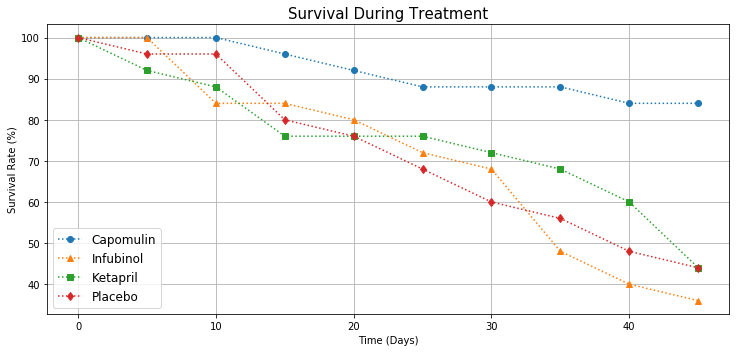

In [37]:
columns = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1, 2, 1)

ax.set_title('Survival During Treatment', fontsize=15)
ax.set_xlabel('Time (Days)')
ax.set_ylabel('Survival Rate (%)')
ax.set_xlim(auto=True)
ax.set_ylim(auto=True)

markers = ['o', '^', 's', 'd']

i = 0
for col in survival_rates[columns].columns:
    ax.plot(survival_rates.index,
            (survival_rates[col]/survival_rates.loc[0, col] * 100),
            linestyle=':',
            marker = markers[i]
           )
    i = i + 1

legend = ax.legend(loc='best', fontsize='large', frameon=True,)

ax.grid(True)
fig.tight_layout()
fig.savefig("OUTPUT/Fig3.png")

## Summary Bar Graph

In [32]:
tumor_change = (tumor_vols_pivot_mean.loc[45,:] - tumor_vols_pivot_mean.loc[0,:]) / tumor_vols_pivot_mean.loc[0,:] * 100

tumor_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

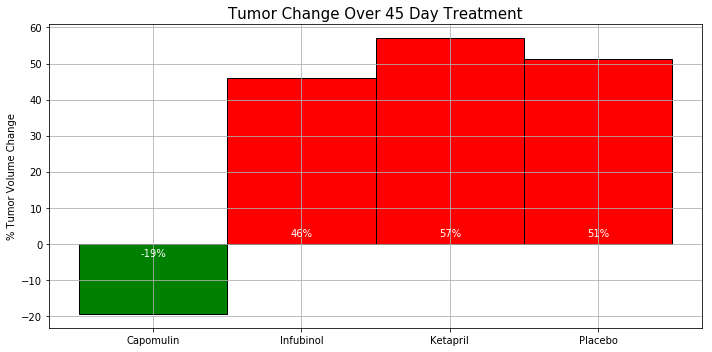

In [38]:
columns = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)

ax.set_title('Tumor Change Over 45 Day Treatment', fontsize=15)
ax.set_ylabel('% Tumor Volume Change')

ax.set_xlim(auto=True)
ax.set_ylim(auto=True)

ax.bar(range(4),
       tumor_change[columns],
       color = ['red' if tumor_change[col] > 0 else 'green' for col in tumor_change[columns].index],
       align = 'center',
       edgecolor='black',
       width = 1.0
      )

plt.xticks(range(len(tumor_change[columns].index)), tumor_change[columns].index)

i = 0

for item in tumor_change[columns]:
    if item < 0:
        location = -3.5
    else:
        location = 2
    
    ax.text(i, location, str(int(item)) + '%', ha = 'center', color = 'white')
    i = i + 1

ax.grid(True)
fig.tight_layout()

fig.savefig("OUTPUT/Fig4.png")